# Homework 6: Regressão Linear Simples 
Isac do Nascimento Lira, 371890

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [53]:
# Define uma função para carregar os dados

def load_csv(path):    
    df = pd.read_csv(path,names=['num_reinv','pag_total'])    
    return df

In [14]:
insdf = load_csv('insurance.csv')
insdf.head()

,num_reinv,pag_total
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


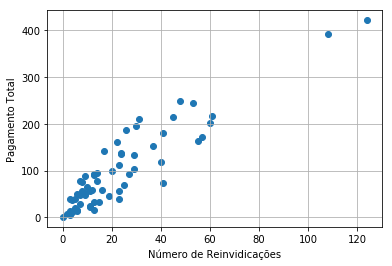

In [23]:
plt.scatter(insdf.num_reinv,insdf.pag_total)
plt.xlabel('Número de Reinvidicações')
plt.ylabel('Pagamento Total')

plt.grid(True)

Observa-se no gráfico uma relação clara entre o número de reinvidicações e o pagamento total.

In [24]:
#Funções úteis

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [60]:
# Implementa a classe do modelo de regressão linear simples
class simple_linear_regression(object):
    
    def _init_(self):
        self.train = None
        self.coef = None
        self.intercept = None
    
    def fit(self,train):
        self.train = train
        self.get_coefficients()
    
    def get_coefficients(self):
        x = [row[0] for row in self.train]
        y = [row[1] for row in self.train]
        x_mean, y_mean = mean(x), mean(y)
        self.coef = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
        self.intercept = y_mean - self.coef * x_mean
    
    def predict(self,data):
        predictions = []
        for row in data:
            ypred = self.intercept + self.coef * row[0]
            predictions.append(ypred)
        return predictions

In [66]:
# Avalia o modelo
from math import sqrt

# Realiza o cálculo da metrica RMSE
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Função que separa os dados em treino e teste

def split_train_split(data,splitRatio):
    
    msk = np.random.rand(len(data)) < splitRatio
    trainSet = data[msk]#.values
    testSet = data[~msk]#.values 
    
    return trainSet,testSet
    
# Função para avaliar o modelo
def evaluate_algorithm(data,algorithm):
    
    train,test = split_train_split(data,0.6)
    
    lm = algorithm()
    lm.fit(train)    
    predicted = lm.predict(test)
    actual = test[:,1]
    pred_rmse= rmse_metric(actual, predicted)
    
    predictedMean = np.zeros_like(actual)
    predictedMean[:] = np.mean(actual)
    mean_rmse = rmse_metric(actual, predictedMean)

    return pred_rmse,mean_rmse,lm

In [80]:
pred_rmse,mean_rmse,lm = evaluate_algorithm(insdf.values,simple_linear_regression)
print('')
print("RMSE - Regressão Linear", pred_rmse)
print("RMSE - Predição pelo valor média", mean_rmse)
print('')


RMSE - Regressão Linear 42.271767332553594
RMSE - Predição pelo valor média 65.68087289669558



Como esperado, o modelo de regressão linear explica bem os dados, tendo um valor RSME menor que a predição pelo valor médio de pagamento.

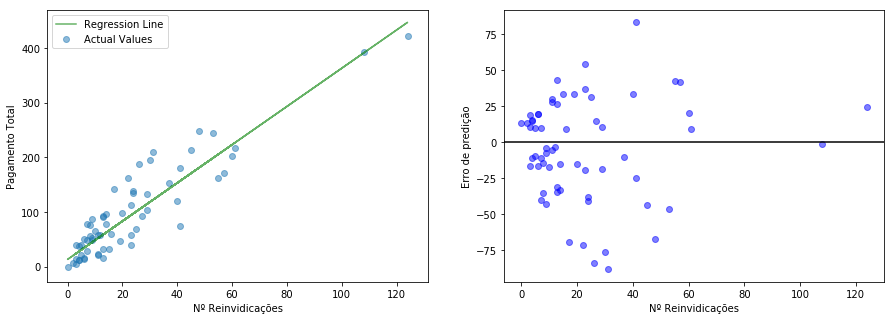

In [91]:
# plota as predições vs dados reais e mostra o erro de predição
x = insdf['num_reinv'].values
y = insdf['pag_total'].values

y_hat = lm.intercept + x.dot(lm.coef)

fig,axs = plt.subplots(1,2,figsize=[15,5])
axs[0].plot(x,y_hat,'g-',label='Regression Line',alpha=0.6)
axs[0].scatter(x,y,alpha=0.5,label='Actual Values')
axs[0].set_xlabel('Nº Reinvidicações')
axs[0].set_ylabel('Pagamento Total')
axs[0].legend(loc='best')

error = (y_hat-y)
axs[1].scatter(x,error,alpha=0.5,color='b')
axs[1].axhline(0,color='k')
axs[1].set_xlabel('Nº Reinvidicações')
axs[1].set_ylabel('Erro de predição')